# LeetCode

## 1、two_sum

### code:

```
/*
 * @lc app=leetcode id=1 lang=cpp
 *
 * [1] Two Sum
 *
 * https://leetcode.com/problems/two-sum/description/
 *
 * algorithms
 * Easy (42.83%)
 * Total Accepted:    1.6M
 * Total Submissions: 3.8M
 * Testcase Example:  '[2,7,11,15]\n9'
 *
 * Given an array of integers, return indices of the two numbers such that they
 * add up to a specific target.
 * 
 * You may assume that each input would have exactly one solution, and you may
 * not use the same element twice.
 * 
 * Example:
 * 
 * 
 * Given nums = [2, 7, 11, 15], target = 9,
 * 
 * Because nums[0] + nums[1] = 2 + 7 = 9,
 * return [0, 1].
 * 
 * 
 * 
 * 
 */
class Solution {
public:
    vector<int> twoSum(vector<int>& nums, int target) {
        unordered_map<int, int> num_index;
        vector<int> result;
        int i;
        for(i = 0;i < nums.size();i++){
            int tmp = target - nums[i];
            auto iter = num_index.find(tmp);
            if(iter != num_index.end()){ // 若匹配的另外一个值在该值的左边，则必然在map里
                result.push_back(i);
                result.push_back(iter->second);
                return result;
            }
            else{ //若匹配的另外一个值在该值的右边，则将该值放进map里，等待被找到
                num_index[nums[i]] = i;
            }
        }
        return result;
    }
};

```

### 解题思路

因为知道taget,当知道一个值时，找另外一个值存不存在时，最快的方法是用hash，O(1)复杂度，那么可以将所有的值放进一个hash表，这需要遍历一遍，然后再遍历一遍，去找索引。那么能不能只遍历一遍呢？可以的，可以一边建立hash表，一边判断该值符不符合条件。若当前值是要找的值之一，匹配的另外一个值在要么当前值的左边，就一定能在hash表里找到，要么在右边，等遍历到它的时候，也一定能找到。若当前值不是要找的值之一，放进hash表里，不影响。

### 思考

这里用unordered_map的原因是，unordered_map 内部采用 hashtable 的数据结构存储。而map是采用红黑树数据结构。
参考https://www.jianshu.com/p/56bb01df8ac7


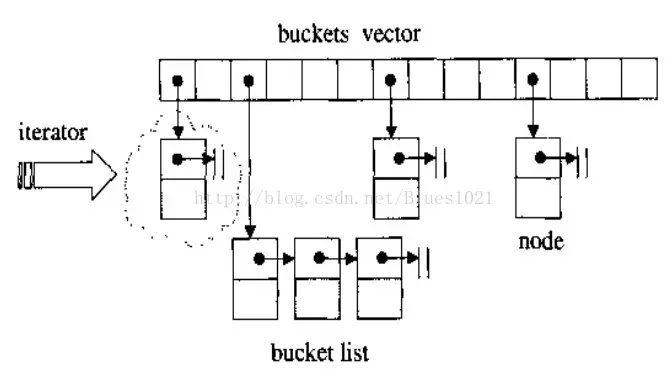

## 2、Reverse Integer

```
/*
 * @lc app=leetcode id=7 lang=cpp
 *
 * [7] Reverse Integer
 *
 * https://leetcode.com/problems/reverse-integer/description/
 *
 * algorithms
 * Easy (25.23%)
 * Total Accepted:    644.5K
 * Total Submissions: 2.6M
 * Testcase Example:  '123'
 *
 * Given a 32-bit signed integer, reverse digits of an integer.
 * 
 * Example 1:
 * 
 * 
 * Input: 123
 * Output: 321
 * 
 * 
 * Example 2:
 * 
 * 
 * Input: -123
 * Output: -321
 * 
 * 
 * Example 3:
 * 
 * 
 * Input: 120
 * Output: 21
 * 
 * 
 * Note:
 * Assume we are dealing with an environment which could only store integers
 * within the 32-bit signed integer range: [−2^31,  2^31 − 1]. For the purpose
 * of this problem, assume that your function returns 0 when the reversed
 * integer overflows.
 * 
 */
#include<queue>
#include <math.h> 
class Solution {
public:
    int reverse(int x) {
        //std::queue<int> que;
        int minus = 1;
        long result = 0;
        long _x = x;
        if(_x < 0)
        {
            minus = -1;
            _x = _x * -1;
        }            
        while(_x!=0)
        {
           int tmp = _x%10;
           _x = _x/10;
           result = result * 10 + tmp;
        }
        if(minus == -1)
        {
            if(result*minus < -pow(2,31))
                return 0;
        }
        else
        {
            if(result*minus > pow(2,31) - 1)
                return 0;
        }
        return result*minus;
        
    }
};

```

### 解题思路

本来想用一个queue来解决，但是这种相当于要遍历2遍，其实可以在每次求余的时候，就开始累计反转数，这样只需要遍历一次。